<a href="https://colab.research.google.com/github/Bhabuk10/Webscraping/blob/main/webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing
 Dependencies 


In [ ]:
import requests 
from bs4 import BeautifulSoup
import csv

Web Scraping

In [ ]:

publication = []

# URL of the page to scrape
url = 'https://nlp.stanford.edu/pubs/'

# Send a request to the URL and get the HTML content
response = requests.get(url)
html_content = response.text

# Create a BeautifulSoup object from the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

In [ ]:
title = soup.title

In [ ]:
print(title)

<title>Publications - The Stanford Natural Language Processing Group </title>


In [ ]:
# Find all the publications on the page

publications = soup.find_all('table', class_='table')

# Loop through each publication and extract the title, date,venue and authors
for pub in publications:
    # Extract the title
    tbody = pub.find_all('tbody')
    # print(tbody)
    for rows in tbody:
      tr = rows.find_all('tr')
      for row in tr:
        title, author, date, venue = row.find_all('td', class_="hide")
        print('Title:', title.text)
        print('author:', author.text)
        print('date:', date.text)
        print('venue:', venue.text)
        print('-------------------------')
        publication.append([title.text.strip(), author.text.strip(), venue.text.strip(), date.text.strip()])


Streaming output truncated to the last 5000 lines.
		    Generative Adversarial Transformers
		  
author: 
		    Hudson , Drew A and Zitnick , C. Lawrence
		  
date: 
		    2021
		  
venue: 
		    
		      The 38th International Conference on Machine Learning , { ICML }
		    
		  
-------------------------
Title: 
		    Text to 3D Scene Generation with Rich Lexical Grounding
		  
author: 
		    Chang , Angel and Monroe , Will and Savva , Manolis and Potts , Christopher and Manning , Christopher D.
		  
date: 
		    2015
		  
venue: 
		    
		      Association for Computational Linguistics and International Joint Conference on Natural Language Processing (ACL-IJCNLP)
		    
		  
-------------------------
Title: 
		    Simulating a File Sharing P2P Network
		  
author: 
		    Mario T. Schlosser and Sepandar D. Kamvar
		  
date: 
		    2002
		  
venue: 
		    
		      Stanford University Technical Report
		    
		  
-------------------------
Title: 
		    The EigenTrust Algorithm for Rep

Converting into pandas dataframe

In [178]:
df = pd.DataFrame(publication, columns=['Title', 'Authors', 'Venue', 'Year'])


In [177]:
df.head(10)

,Title,Authors,Venue,Year
0,Learning Music Helps You Read: Using Transfer ...,Isabel Papadimitriou and Dan Jurafsky,Empirical Methods in Natural Language Processi...,2020
1,A Comparison of C hinese Parsers for S tanford...,"Che , Wanxiang and Spitkovsky , Valentin I. an...",Association for Computational Linguistics (ACL),2012
2,Who should I cite? Learning literature search ...,Steven Bethard and Dan Jurafsky,ACM Conference on Information and Knowledge Ma...,2010
3,Phrasal: A Toolkit for New Directions in Stati...,"Green , Spence and Cer , Daniel and Manning , ...",North American Association for Computational L...,2014
4,Feature Noising for Log-linear Structured Pred...,Sida I. Wang and Mengqiu Wang and Stefan Wager...,Empirical Methods in Natural Language Processi...,2013
5,Exploring the Boundaries: Gene and Protein Ide...,Shipra Dingare and Jenny Finkel and Christophe...,Proceedings of the BioCreative Workshop,2004
6,Textual Entailment Features for Machine Transl...,Sebastian Pad\'o and Michel Galley and Dan Jur...,European Association for Computational Linguis...,2009
7,Combining Distant and Partial Supervision for ...,Gabor Angeli and Julie Tibshirani and Jean Y. ...,Empirical Methods in Natural Language Processi...,2014
8,Characterizing intrinsic compositionality in t...,Shikhar Murty and Pratyusha Sharma and Jacob A...,The Eleventh International Conference on Learn...,2023
9,Crisis MT: Developing A Cookbook For Machine T...,Will Lewis and Robert Munro and Stephan Vogel,"{ Annual Workshop on Machine Translation , EMN...",2011


In [ ]:
df.tail()

,Title,Authors,Venue,Year
569,Fixing Model Bugs with Natural Language Patches,"Murty , Shikhar and Manning , Christopher and ...",Proceedings of the 2022 Conference on Empirica...,2022
570,Characterizing Microblogs with Topic Models,"Ramage , Daniel and Dumais , Susan and Lieblin...",ICWSM,2010
571,Naturalizing a Programming Language via Intera...,S. I. Wang and S. Ginn and P. Liang and C. D. ...,Association for Computational Linguistics (ACL),2017
572,Refining Targeted Syntactic Evaluation of Lang...,"Newman , Benjamin and Ang , Kai-Siang and Gong...",Annual Conference of the North American Chapte...,2021
573,A computational analysis of poetic style: Imag...,"Kao , Justine T. and Dan Jurafsky",Linguistic Issues in Language Technology,2015


Data Preprocessing

In [ ]:
df.shape

(574, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    574 non-null    object
 1   Authors  574 non-null    object
 2   Venue    574 non-null    object
 3   Year     574 non-null    object
dtypes: object(4)
memory usage: 18.1+ KB


In [ ]:
pubs_per_year = df.groupby('Year').size().reset_index(name='Count')
(pubs_per_year)


,Year,Count
0,1999,4
1,2000,6
2,2001,11
3,2002,18
4,2003,24
5,2004,18
6,2005,14
7,2006,11
8,2007,14
9,2007 URL pubs/goldwater_griffiths_acl07.pdf,1


In [ ]:
# Deleting unnecessary rows from dataframe
pubs_per_year_  = pubs_per_year.drop(index=9).reset_index(drop=True)

In [ ]:
pubs_per_year_ 

,Year,Count
0,1999,4
1,2000,6
2,2001,11
3,2002,18
4,2003,24
5,2004,18
6,2005,14
7,2006,11
8,2007,14
9,2008,21


In [ ]:
pubs_per_author = df.groupby('Authors').size().reset_index(name='Count')
pubs_per_author

,Authors,Count
0,A. T. Chaganty and P. Liang,1
1,Abigail See and Aneesh Pappu and Rohun Saxena ...,1
2,Abigail See and Minh-Thang Luong and Christoph...,1
3,Abigail See and Stephen Roller and Douwe Kiela...,1
4,Adam Vogel and Dan Jurafsky,2
...,...,...
486,{ Richard Socher and Brody Huval and Bharath B...,1
487,{ Richard Socher and Eric H. Huang and Jeffrey...,1
488,{ Richard Socher and John Bauer and Christophe...,1
489,{ Richard Socher and Milind Ganjoo and Christo...,1


In [ ]:
max_pubs_per_author = df.groupby('Authors')['Venue'].count().max()
print(f"The maximum number of publications done by a single author is: {max_pubs_per_author}")


The maximum number of publications done by a single author is: 13


In [ ]:
max_pubs_per_author = df.groupby('Authors')['Venue'].count().reset_index(name='Count')
max_pubs_per_author_sorted = max_pubs_per_author.sort_values('Count', ascending=False).reset_index(drop=True)
print("Maximum publications done by authors in descending order:")
print(max_pubs_per_author_sorted)


Maximum publications done by authors in descending order:
                                               Authors  Count
0                 Dan Klein and Christopher D. Manning     13
1    Spitkovsky , Valentin I. and Alshawi , Hiyan a...      8
2              Mengqiu Wang and Christopher D. Manning      7
3                  Nathanael Chambers and Dan Jurafsky      6
4         Jenny Rose Finkel and Christopher D. Manning      5
..                                                 ...    ...
486  Jenny Finkel and Shipra Dingare and Huy Nguyen...      1
487  Jenny Finkel and Shipra Dingare and Christophe...      1
488  Jeffrey Pennington and Richard Socher and Chri...      1
489  Jason M. Brenier and Daniel Cer and Daniel Jur...      1
490         { Sonal Gupta and Christopher D. Manning }      1

[491 rows x 2 columns]


In [ ]:
max_pubs_per_author_sorted.head(10)

,Authors,Count
0,Dan Klein and Christopher D. Manning,13
1,"Spitkovsky , Valentin I. and Alshawi , Hiyan a...",8
2,Mengqiu Wang and Christopher D. Manning,7
3,Nathanael Chambers and Dan Jurafsky,6
4,Jenny Rose Finkel and Christopher D. Manning,5
5,Christopher D. Manning,5
6,Panupong Pasupat and Percy Liang,3
7,"Clark , Kevin and Manning , Christopher D.",3
8,Bill MacCartney and Christopher D. Manning,3
9,"Voigt , Rob and Jurafsky , Dan",3


In [ ]:
pubs_per_venue = df.groupby('Venue').size().reset_index(name='Count')
pubs_per_venue

,Venue,Count
0,,5
1,14th European Conference on Machine Learning (...,1
2,15th Conference of the European Chapter of the...,1
3,16th Annual Conference of the North American C...,1
4,17th Annual Conference of the North American C...,2
...,...,...
280,{ Language Resources and Evaluation Conference...,1
281,{ Named Entities Workshop (NEWS) },1
282,{ North American Association for Computational...,1
283,{ North American Association for Computational...,1


In [ ]:
max_venues = pubs_per_venue.nlargest(20, 'Count').sort_values(by='Count', ascending=False)
max_venues

,Venue,Count
39,Association for Computational Linguistics (ACL),77
92,Empirical Methods in Natural Language Processi...,63
176,North American Association for Computational L...,17
87,EMNLP,8
246,Text Analysis Conference (TAC),8
240,Stanford University Technical Report,7
254,Transactions of the Association for Computatio...,6
181,North American Association for Computational L...,6
158,Language Resources and Evaluation Conference (...,6
135,International Conference on Machine Learning (...,6


In [ ]:
max_venues_ = max_venues.drop(index=0).reset_index(drop=True)
max_venues_ 

,Venue,Count
0,Association for Computational Linguistics (ACL),77
1,Empirical Methods in Natural Language Processi...,63
2,North American Association for Computational L...,17
3,EMNLP,8
4,Text Analysis Conference (TAC),8
5,Stanford University Technical Report,7
6,Transactions of the Association for Computatio...,6
7,North American Association for Computational L...,6
8,Language Resources and Evaluation Conference (...,6
9,International Conference on Machine Learning (...,6


In [ ]:
pubs_per_year_venue = df.groupby(['Year', 'Venue']).size().reset_index(name='Count')
pubs_per_year_venue.head(15)

,Year,Venue,Count
0,1999,"AusWeb99 , the Fifth Australian World Wide Web...",1
1,1999,Endangered Languages Workshop,1
2,1999,Lexical And Constructional Aspects of Linguist...,1
3,1999,Studies in Contemporary Phrase Structure Grammar,1
4,2000,AMIA Fall Symposium 2000,1
5,2000,Advances in Probabilistic and Other Parsing Te...,1
6,2000,"AusWeb 2000 , the Sixth Australian World Wide ...",1
7,2000,BCATS,1
8,2000,Joint SIGDAT Conference on Empirical Methods i...,1
9,2000,Ninth Euralex International Congress (Euralex ...,1


Data Visualization


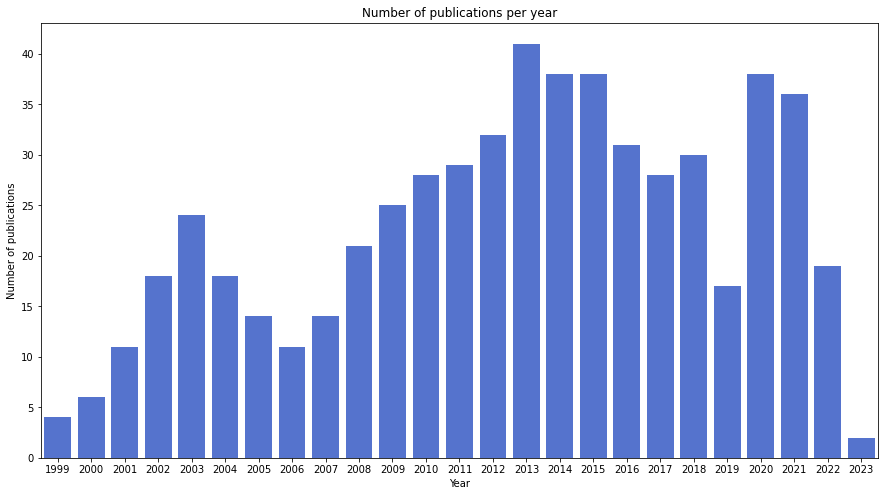

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot(x='Year', y='Count', data=pubs_per_year_, color='royalblue')
plt.title('Number of publications per year')

plt.xlabel('Year')
plt.ylabel('Number of publications')

plt.show()


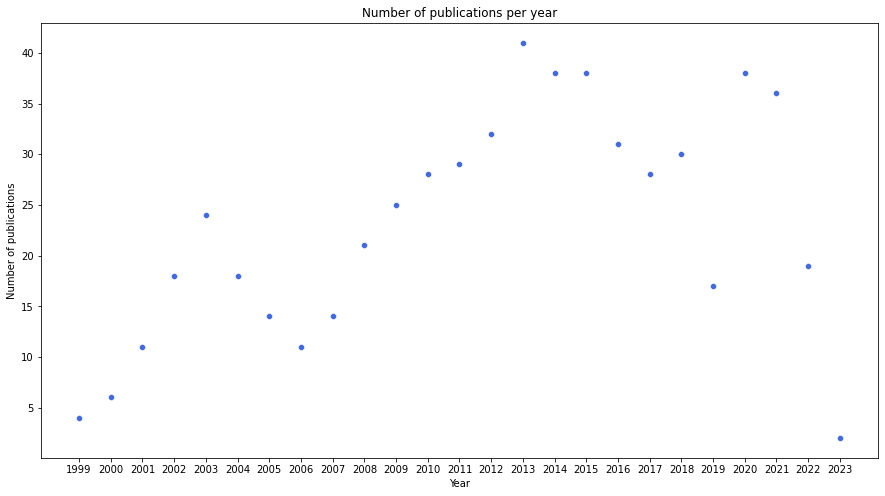

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.scatterplot(x='Year', y='Count', data=pubs_per_year_, color='royalblue')
plt.title('Number of publications per year')

plt.xlabel('Year')
plt.ylabel('Number of publications')

plt.show()



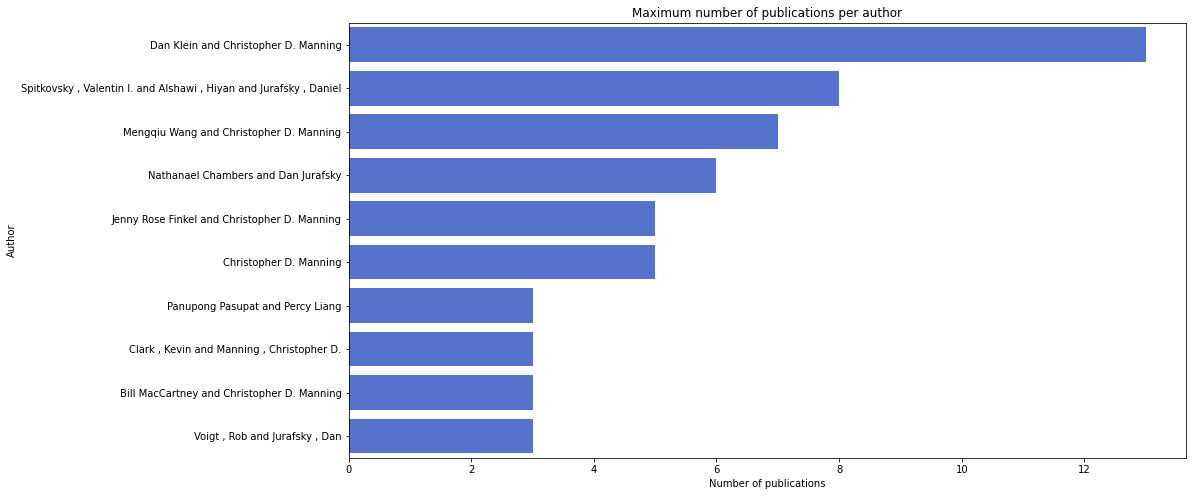

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot(x='Count', y='Authors', data=max_pubs_per_author_sorted.head(10), color='royalblue')
plt.title('Maximum number of publications per author')
plt.xlabel('Number of publications')
plt.ylabel('Author')
plt.show()


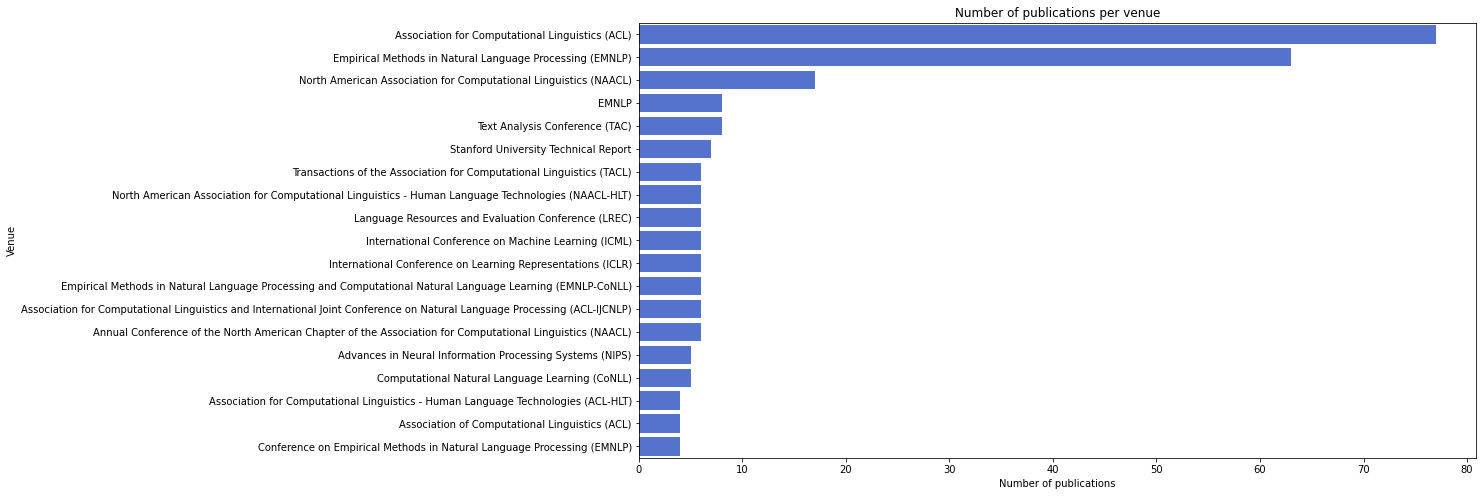

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot(x='Count', y='Venue', data=max_venues_, color='royalblue')
plt.title('Number of publications per venue')
plt.xlabel('Number of publications')
plt.ylabel('Venue')
plt.show()
